<a href="https://colab.research.google.com/github/ktuanPT373/STOCK-PRICE-PREDICTION/blob/main/SVM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT NECESSARY MODULE/PACKAGE**

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


In [22]:
df_stock= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/^GSPC_historical_data_yfinance.csv')
target= 'Close'
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.index= df_stock['Date']
print(df_stock.dtypes)

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Date      datetime64[ns]
dtype: object


In [23]:
df_stock.head()


,Open,High,Low,Close,Volume,Date
Date,,,,,,
2013-12-02,1806.55,1810.02,1798.60,1800.90,3095430000,2013-12-02
2013-12-03,1800.10,1800.10,1787.85,1795.15,3475680000,2013-12-03
2013-12-04,1793.15,1799.80,1779.09,1792.81,3610540000,2013-12-04
2013-12-05,1792.82,1792.82,1783.38,1785.03,3336880000,2013-12-05
2013-12-06,1788.36,1806.04,1788.36,1805.09,3150030000,2013-12-06


In [24]:
df_stock.tail()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2023-11-22,4553.04,4568.43,4545.05,4556.62,3042810000,2023-11-22
2023-11-24,4555.84,4560.31,4552.80,4559.34,1639500000,2023-11-24
2023-11-27,4554.86,4560.52,4546.32,4550.43,3403990000,2023-11-27
2023-11-28,4545.55,4568.14,4540.51,4554.89,3586240000,2023-11-28
2023-11-29,4571.84,4587.64,4547.15,4550.58,4418760000,2023-11-29


**VISUALIZING DATASET**

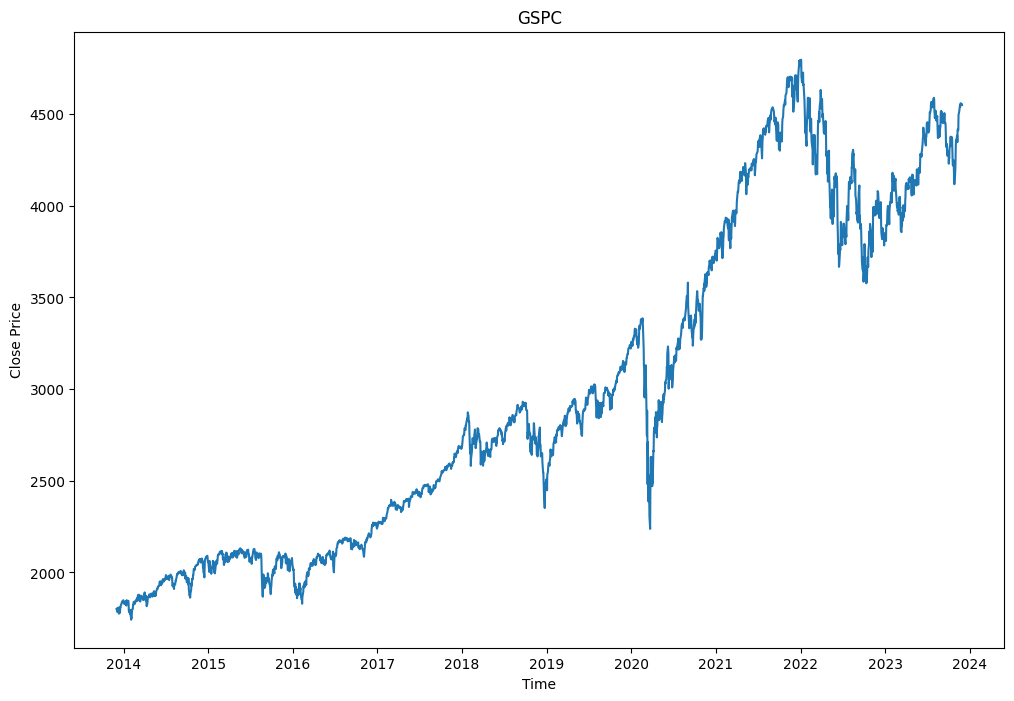

In [53]:
plt.figure(figsize=(12,8))
plt.title('GSPC')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.plot(df_stock[target])
plt.show()


**DIVIDE DATASET INTO TRAIN SET, TEST SET**

In [26]:
x = df_stock.drop([target, 'Date'], axis=1)
y=df_stock[target]
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.8, random_state= 100)

**USING GRIDSEARCHCV TO FINE THE BEST PARAMETER FOR THE SVR MODEL AND USING IT TO TRAIN**

In [30]:
param_grid = {
    'reg__C': [0.1, 1, 10],
    'reg__kernel': ['linear', 'rbf', 'poly'],
    'reg__epsilon': [0.1, 0.2, 0.5]
}

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', SVR())
])

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reg', SVR())]),
             param_grid={'reg__C': [0.1, 1, 10],
                         'reg__epsilon': [0.1, 0.2, 0.5],
                         'reg__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [34]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'reg__C': 10, 'reg__epsilon': 0.1, 'reg__kernel': 'linear'}


In [54]:
best_model = grid_search.best_estimator_
y_predict= best_model.predict(x_test)

**EVALUATION THE MODEL**

In [55]:
mae_best = mean_absolute_error(y_test, y_predict)
mse_best = mean_squared_error(y_test, y_predict)
r2_best = r2_score(y_test, y_predict)

print(f'Mean Absolute Error (Best Model): {mae_best}')
print(f'Mean Squared Error (Best Model): {mse_best}')
print(f'R-squared (Best Model): {r2_best}')


Mean Absolute Error (Best Model): 11.454866279343197
Mean Squared Error (Best Model): 308.4022922674935
R-squared (Best Model): 0.9995999661981362


In [59]:
comparison_df = pd.DataFrame({'Date': x_test.index,
                               'Actual': y_test.values,
                               'Predicted': y_predict})
comparison_df = comparison_df.sort_values(by='Date')

comparison_df.set_index('Date', inplace=True)




In [60]:
comparison_df

,Actual,Predicted
Date,,
2013-12-03,1795.15,1796.13
2013-12-23,1827.99,1826.97
2013-12-24,1833.32,1832.43
2014-01-10,1842.37,1839.28
2014-01-13,1819.20,1832.59
...,...,...
2023-10-10,4358.24,4360.34
2023-11-03,4358.34,4351.79
2023-11-17,4514.02,4512.62


from matplotlib import pyplot as plt
comparison_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

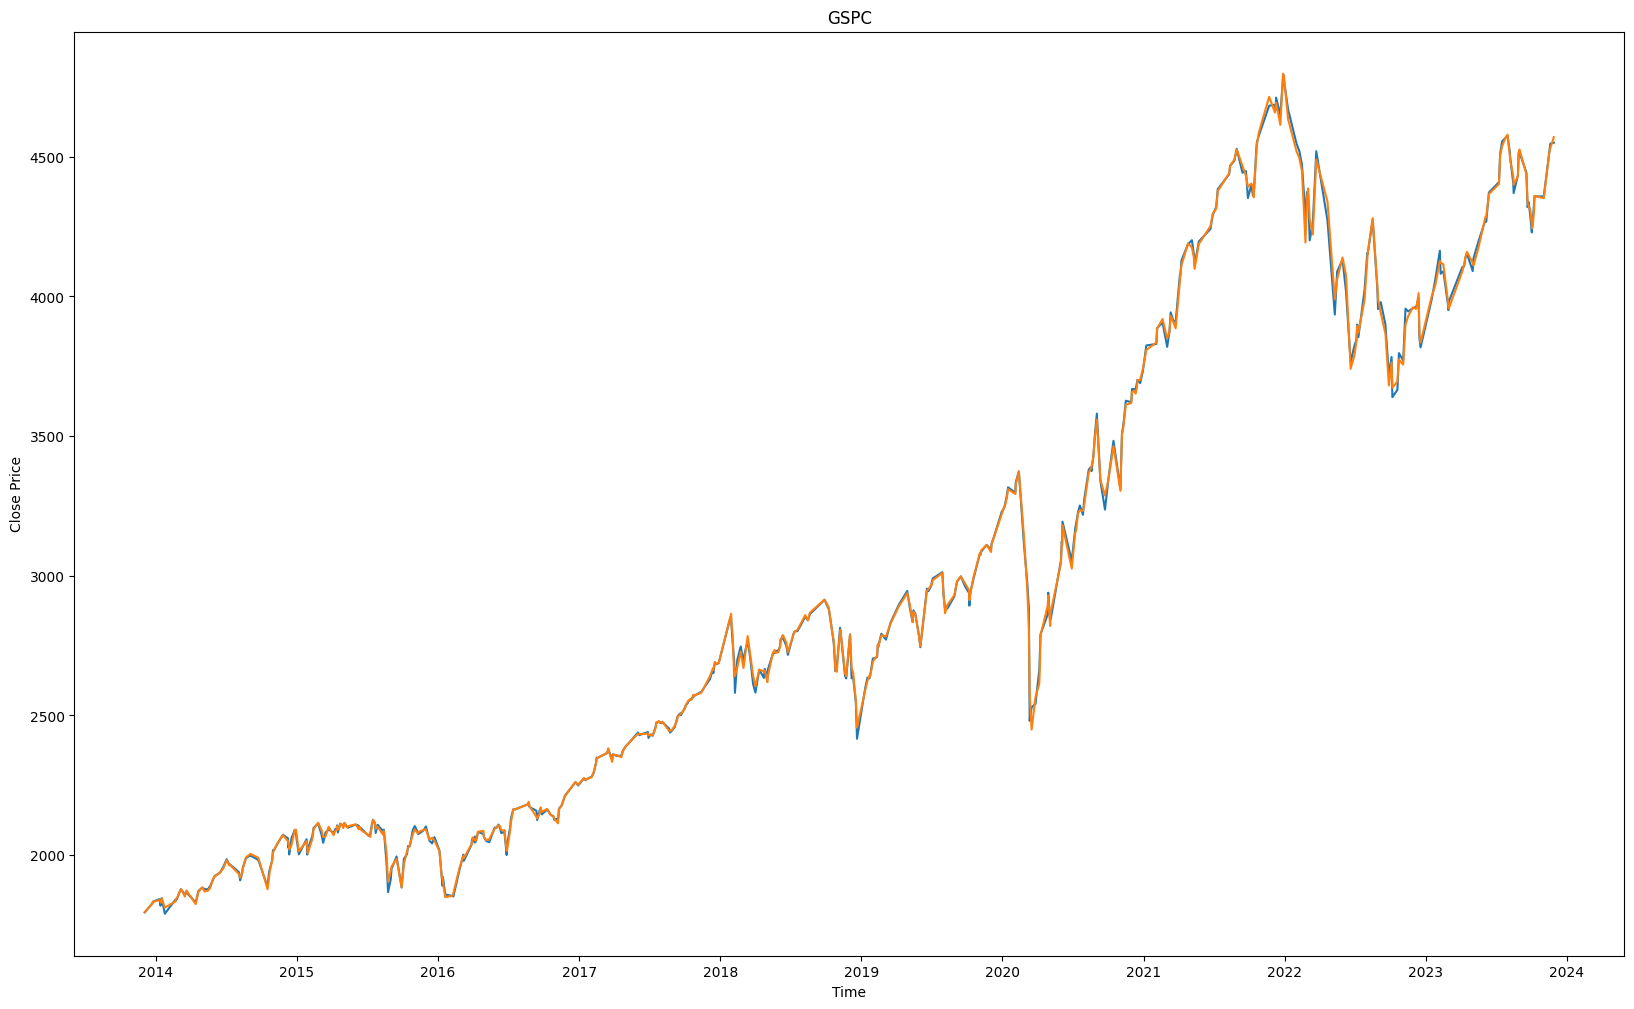

In [58]:
plt.figure(figsize=(20,12))
plt.title('GSPC')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.plot(comparison_df[['Actual', 'Predicted']])
plt.show()